In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import wget
from os.path import exists

In [5]:
if not exists('data/wine.data'):
    wget.download('https://raw.githubusercontent.com/vsvale/datasets/main/wine.data','data')

In [8]:
df = pd.read_csv('data/wine.data',header=None)

In [9]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
x = df.values

In [13]:
x = scale(x)

In [15]:
pca = PCA().fit(x)
print(pca.explained_variance_ratio_)

[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


/tmp/ipykernel_702/678099252.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,50,1)


Text(0, 0.5, 'Cumulative explained variance')

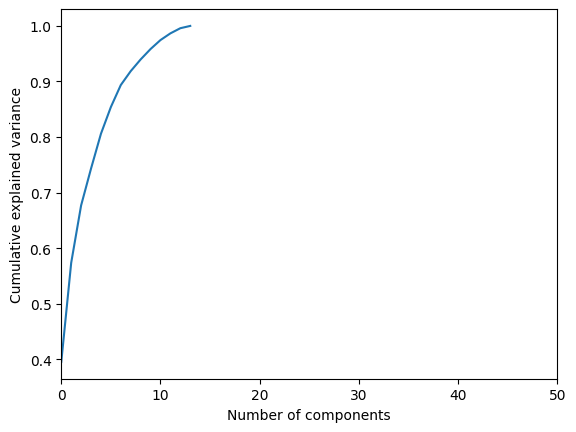

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,50,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

/tmp/ipykernel_702/2602200853.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,5,1)


Text(0, 0.5, 'Cumulative explained variance')

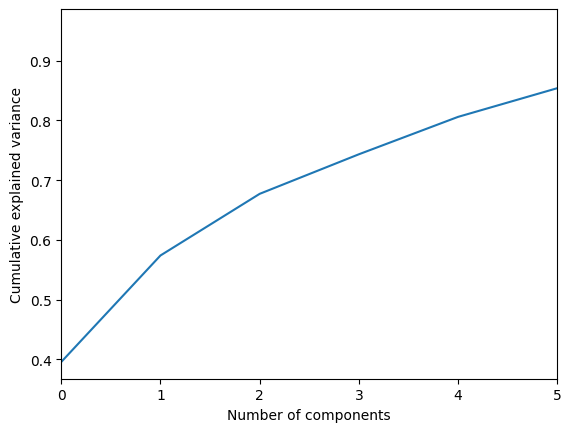

In [17]:
pca = PCA(.95).fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

/tmp/ipykernel_702/1448829675.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,5,1)


Text(0, 0.5, 'Cumulative explained variance')

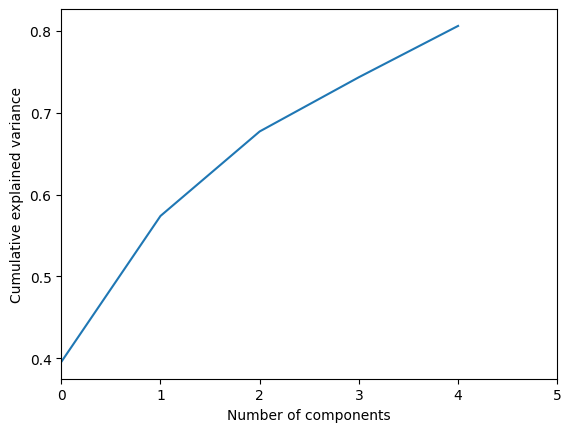

In [18]:
pca = PCA(n_components=5).fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
print(pca.components_)

[[ 0.39366953 -0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016
  -0.35926404 -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265
  -0.35052618 -0.26951525]
 [-0.00569041 -0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143
  -0.06711983  0.00131345 -0.0269887  -0.04122256 -0.52978274  0.27790735
   0.16277625 -0.36605886]
 [ 0.00121795 -0.20740081  0.08879606  0.62610236  0.6119896   0.13098458
   0.14650775  0.15096275  0.16997551  0.14987959 -0.1372663   0.08532854
   0.16620436 -0.12668685]
 [ 0.12246373 -0.08191848  0.46988824 -0.24984122  0.07199322 -0.16321412
   0.19098521  0.14461667 -0.32801272  0.46275771  0.07211248 -0.43466618
   0.15672341 -0.2557949 ]
 [ 0.15758395 -0.25089415 -0.18860015 -0.0935236   0.0465675   0.77833048
  -0.14466563 -0.11200553 -0.43257916  0.0915882  -0.0462696  -0.02986657
  -0.14419358 -0.08440794]]
